# 训练算法：使用梯度上升找到最佳参数

梯度上升法伪代码：  
每个回归系数初始化为1  
重复R次：  
&emsp;&emsp;计算整个数据集的梯度  
&emsp;&emsp;使用alpha \times gradient更新回归系数的向量  
&emsp;&emsp;返回回归系数

In [1]:
import numpy as np

## 加载初始化数据，得到数据向量和特征标签向量

In [2]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        # 每行前两个值是X1、X2, 为方便计算将X0设置为1.0
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

## sigmoid函数

In [3]:
def sigmoid(inX):
    return 1.0 / (1+ np.exp(-inX))

## 梯度上升求最佳参数

In [4]:
def gradAsent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    # transpose函数为矩阵的转置
    labelMat = np.mat(classLabels).transpose()
    # m行n列
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    # n行1列数组
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        # 计算真实类别与预测类别的差值
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [5]:
dataArr, labelMat = loadDataSet()

In [6]:
weights = gradAsent(dataArr, labelMat)

In [7]:
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 分析数据：画出决策边界

### 画出数据集和Logistic回归最佳拟合直线的函数

In [8]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    # 加载初始化数据
    dataMat, labelMat = loadDataSet()
    # 转化为numpy矩阵
    dataArr = np.array(dataMat)
    # 得到dataArr的行数
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    # 1类和0类分别存储在列表中
    for i in range(n):
        if int(labelMat[i]) == 1:
            # 标识为1放入x1,y1的数组
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            # 标识为0放入x2,y2的数组
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    plt.figure()
    ax = plt.subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker='s')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    # x1的取值范围
    x = np.arange(-3.0, 3.0, 0.1)
    # 在表达式0 = w0x0 + w1x1 + w2x2中，x0=1
    # 可解出x2的表达式，x2 = (-w0-w1x1)/w2
    y = (-weights[0]-weights[1] * x)/weights[2]
    # 画出x1, x2的直线
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

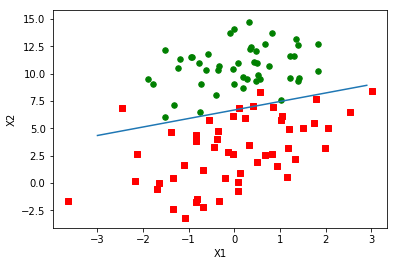

In [9]:
plotBestFit(weights.getA())

这个分类结果中只错分了两到四个点，这个方法需要大量的计算（300次乘法）

# 训练算法：随机梯度上升

&emsp;&emsp;在上述算法中，进行改进：一次仅用一个样本点来更新回归系数，由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习算法。  
随机梯度上升算法的伪代码：  
所有回归系数初始化为1  
对数据集中每个样本  
&emsp;&emsp;计算该样本的梯度
&emsp;&emsp;使用alpha \times gradient更新回归系数  
返回回归系数值

## 随机梯度上升算法

In [13]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

随机梯度上升算法与梯度上升算法的区别：<br/>
1. 梯度上升算法中的h和error都是向量，而随机梯度上升算法中的h和error全是数值
2. 随机梯度上升算法没有矩阵的转换过程，所有变量的数据类型都是Numpy数组

In [14]:
dataArr, labelMat = loadDataSet()

In [15]:
weights = stocGradAscent0(np.array(dataArr), labelMat)

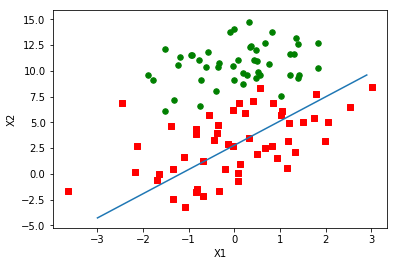

In [16]:
plotBestFit(weights)

## 改进的随机梯度上升算法

In [20]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    import random
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            # alpha每次迭代的时候都会调整，会缓解数据波动或者高频波动
            alpha = 4 / (1.0 + j + i) + 0.01
            # 随机选取更新，将减少周期性的波动
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(list(dataIndex)[randIndex])
    return weights

In [21]:
dataArr, labelMat = loadDataSet()

In [22]:
weights = stocGradAscent1(np.array(dataArr), labelMat)

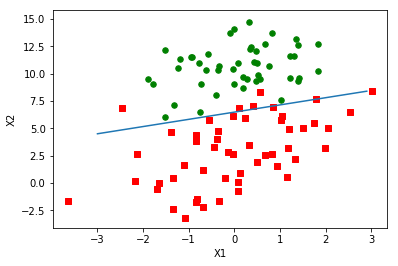

In [23]:
plotBestFit(weights)

In [25]:
weights = stocGradAscent1(np.array(dataArr), labelMat, numIter=500)

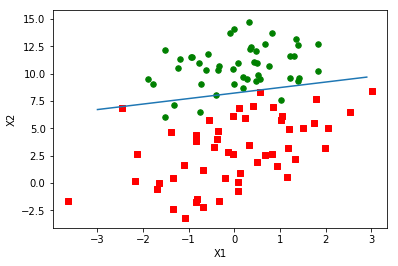

In [26]:
plotBestFit(weights)